Pruned Model trained on SNLI and tested on  ANLI

In [ ]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer,AutoTokenizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os
import torch
import os
os.environ["WANDB_MODE"] = "disabled"


In [ ]:
!pip install datasets
from datasets import Dataset


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/experiments_data/

Mounted at /content/drive
adversarial_data.csv		  high_level_phenomena.csv	small_snli_dev_3k.csv
adversarial_data_final.csv	  logs				small_snli_test_1.5k.csv
adversarial_predictions.csv	  low_level_phenomena.csv	small_snli_test_3k.csv
adversarial_predictions_test.csv  model				small_snli_train_15k.csv
baseline_model_output		  model_output			small_snli_train_20k.csv
distilbert_baseline_snli_output   model_outputs			snli_1.0_dev.txt
distilbert_output		  multinli_1.0_dev_matched.csv	snli_1.0_test.txt
filtered_for_reasoning.csv	  multinli_1.0_train.csv	snli_dev.csv
final_adversarial_data.csv	  predictions_output.csv	snli_test.csv
final_baseline_model_output	  small_snli_dev_1.5k.csv	snli_train.csv


In [ ]:
#paths to pruned model folders
model_folders = [
    "/content/drive/MyDrive/EXPERIMENTS_MODELS/pruned_baseline/single_layer_pruning_5",
    "/content/drive/MyDrive/EXPERIMENTS_MODELS/pruned_baseline/single_layer_pruning_0",
    "/content/drive/MyDrive/EXPERIMENTS_MODELS/pruned_baseline/even_layer_pruning",
    "/content/drive/MyDrive/EXPERIMENTS_MODELS/pruned_baseline/middle_layer_pruning",
    "/content/drive/MyDrive/EXPERIMENTS_MODELS/pruned_baseline/top_layer_pruning"
]

In [ ]:

def prepare_dataframe(file_path):
    df = pd.read_csv(file_path)
    df['input_text'] = df['sentence1'] + " [SEP] " + df['sentence2']
    label_mapping = {'neutral': 0, 'contradiction': 1, 'entailment': 2}
    df['label'] = df['gold_label'].map(label_mapping)
    df = df[['input_text', 'label']].dropna()
    return df



In [ ]:
#ANLI data
adversarial_test_path = '/content/drive/MyDrive/experiments_data/filtered_for_reasoning.csv'
df_adversarial_test = prepare_dataframe(adversarial_test_path)

adversarial_test_dataset = Dataset.from_pandas(df_adversarial_test)


Evaluating model from /content/drive/MyDrive/EXPERIMENTS_MODELS/pruned_baseline/single_layer_pruning_5


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EXPERIMENTS_MODELS/pruned_baseline/single_layer_pruning_5 and are newly initialized: ['distilbert.transformer.layer.0.attention.k_lin.bias', 'distilbert.transformer.layer.0.attention.k_lin.weight', 'distilbert.transformer.layer.0.attention.out_lin.bias', 'distilbert.transformer.layer.0.attention.out_lin.weight', 'distilbert.transformer.layer.0.attention.q_lin.bias', 'distilbert.transformer.layer.0.attention.q_lin.weight', 'distilbert.transformer.layer.0.attention.v_lin.bias', 'distilbert.transformer.layer.0.attention.v_lin.weight', 'distilbert.transformer.layer.0.ffn.lin1.bias', 'distilbert.transformer.layer.0.ffn.lin1.weight', 'distilbert.transformer.layer.0.ffn.lin2.bias', 'distilbert.transformer.layer.0.ffn.lin2.weight', 'distilbert.transformer.layer.0.output_layer_norm.bias', 'distilbert.transformer.layer.0.output_layer_norm.weight', 'distilbert.transformer.l

Map:   0%|          | 0/226 [00:00<?, ? examples/s]


Overall Classification Report:
               precision    recall  f1-score   support

      neutral       0.50      0.56      0.53       102
contradiction       0.42      0.26      0.32        74
   entailment       0.27      0.36      0.31        50

     accuracy                           0.42       226
    macro avg       0.40      0.39      0.38       226
 weighted avg       0.42      0.42      0.41       226


Overall Confusion Matrix:


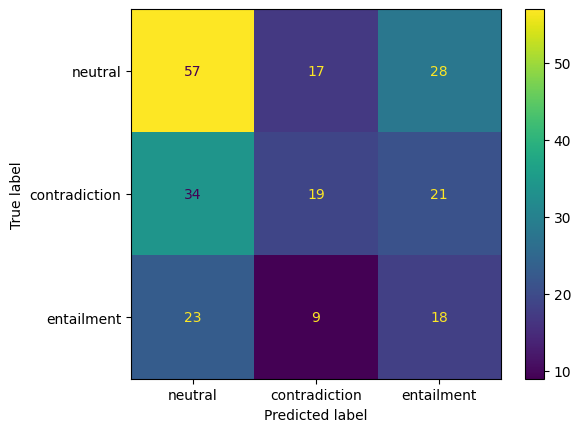

Predictions saved to /content/drive/MyDrive/EXPERIMENTS_PREDICTIONS/pruned_reasoning_anli/single_layer_pruning_5_predictions.csv

Evaluating model from /content/drive/MyDrive/EXPERIMENTS_MODELS/pruned_baseline/single_layer_pruning_0


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EXPERIMENTS_MODELS/pruned_baseline/single_layer_pruning_0 and are newly initialized: ['distilbert.transformer.layer.0.attention.k_lin.bias', 'distilbert.transformer.layer.0.attention.k_lin.weight', 'distilbert.transformer.layer.0.attention.out_lin.bias', 'distilbert.transformer.layer.0.attention.out_lin.weight', 'distilbert.transformer.layer.0.attention.q_lin.bias', 'distilbert.transformer.layer.0.attention.q_lin.weight', 'distilbert.transformer.layer.0.attention.v_lin.bias', 'distilbert.transformer.layer.0.attention.v_lin.weight', 'distilbert.transformer.layer.0.ffn.lin1.bias', 'distilbert.transformer.layer.0.ffn.lin1.weight', 'distilbert.transformer.layer.0.ffn.lin2.bias', 'distilbert.transformer.layer.0.ffn.lin2.weight', 'distilbert.transformer.layer.0.output_layer_norm.bias', 'distilbert.transformer.layer.0.output_layer_norm.weight', 'distilbert.transformer.l

Map:   0%|          | 0/226 [00:00<?, ? examples/s]


Overall Classification Report:
               precision    recall  f1-score   support

      neutral       0.45      0.53      0.49       102
contradiction       0.44      0.20      0.28        74
   entailment       0.25      0.36      0.29        50

     accuracy                           0.38       226
    macro avg       0.38      0.36      0.35       226
 weighted avg       0.40      0.38      0.38       226


Overall Confusion Matrix:


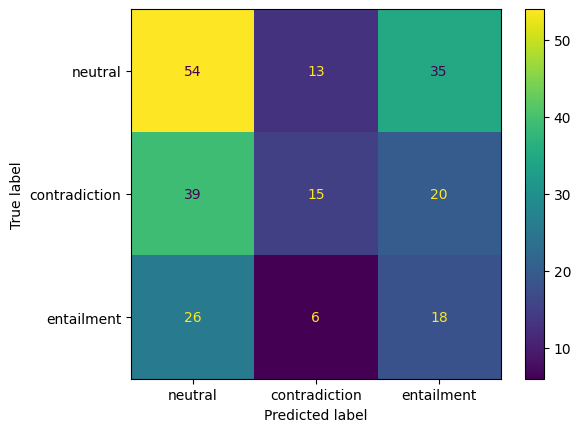

Predictions saved to /content/drive/MyDrive/EXPERIMENTS_PREDICTIONS/pruned_reasoning_anli/single_layer_pruning_0_predictions.csv

Evaluating model from /content/drive/MyDrive/EXPERIMENTS_MODELS/pruned_baseline/even_layer_pruning


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EXPERIMENTS_MODELS/pruned_baseline/even_layer_pruning and are newly initialized: ['distilbert.transformer.layer.0.attention.k_lin.bias', 'distilbert.transformer.layer.0.attention.k_lin.weight', 'distilbert.transformer.layer.0.attention.out_lin.bias', 'distilbert.transformer.layer.0.attention.out_lin.weight', 'distilbert.transformer.layer.0.attention.q_lin.bias', 'distilbert.transformer.layer.0.attention.q_lin.weight', 'distilbert.transformer.layer.0.attention.v_lin.bias', 'distilbert.transformer.layer.0.attention.v_lin.weight', 'distilbert.transformer.layer.0.ffn.lin1.bias', 'distilbert.transformer.layer.0.ffn.lin1.weight', 'distilbert.transformer.layer.0.ffn.lin2.bias', 'distilbert.transformer.layer.0.ffn.lin2.weight', 'distilbert.transformer.layer.0.output_layer_norm.bias', 'distilbert.transformer.layer.0.output_layer_norm.weight', 'distilbert.transformer.layer

Map:   0%|          | 0/226 [00:00<?, ? examples/s]


Overall Classification Report:
               precision    recall  f1-score   support

      neutral       0.48      0.60      0.53       102
contradiction       0.44      0.19      0.26        74
   entailment       0.28      0.38      0.32        50

     accuracy                           0.42       226
    macro avg       0.40      0.39      0.37       226
 weighted avg       0.42      0.42      0.40       226


Overall Confusion Matrix:


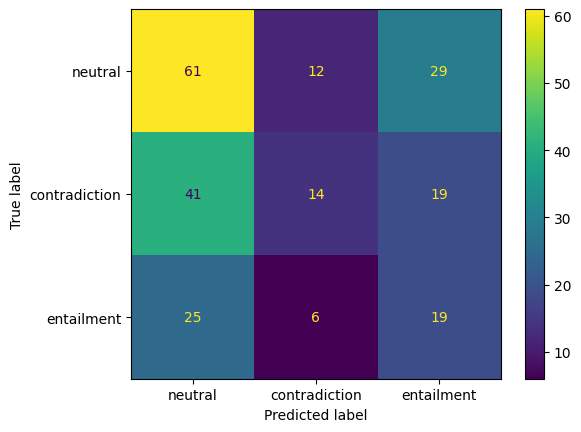

Predictions saved to /content/drive/MyDrive/EXPERIMENTS_PREDICTIONS/pruned_reasoning_anli/even_layer_pruning_predictions.csv

Evaluating model from /content/drive/MyDrive/EXPERIMENTS_MODELS/pruned_baseline/middle_layer_pruning


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EXPERIMENTS_MODELS/pruned_baseline/middle_layer_pruning and are newly initialized: ['distilbert.transformer.layer.0.attention.k_lin.bias', 'distilbert.transformer.layer.0.attention.k_lin.weight', 'distilbert.transformer.layer.0.attention.out_lin.bias', 'distilbert.transformer.layer.0.attention.out_lin.weight', 'distilbert.transformer.layer.0.attention.q_lin.bias', 'distilbert.transformer.layer.0.attention.q_lin.weight', 'distilbert.transformer.layer.0.attention.v_lin.bias', 'distilbert.transformer.layer.0.attention.v_lin.weight', 'distilbert.transformer.layer.0.ffn.lin1.bias', 'distilbert.transformer.layer.0.ffn.lin1.weight', 'distilbert.transformer.layer.0.ffn.lin2.bias', 'distilbert.transformer.layer.0.ffn.lin2.weight', 'distilbert.transformer.layer.0.output_layer_norm.bias', 'distilbert.transformer.layer.0.output_layer_norm.weight', 'distilbert.transformer.lay

Map:   0%|          | 0/226 [00:00<?, ? examples/s]


Overall Classification Report:
               precision    recall  f1-score   support

      neutral       0.49      0.61      0.54       102
contradiction       0.43      0.22      0.29        74
   entailment       0.27      0.34      0.30        50

     accuracy                           0.42       226
    macro avg       0.40      0.39      0.38       226
 weighted avg       0.42      0.42      0.41       226


Overall Confusion Matrix:


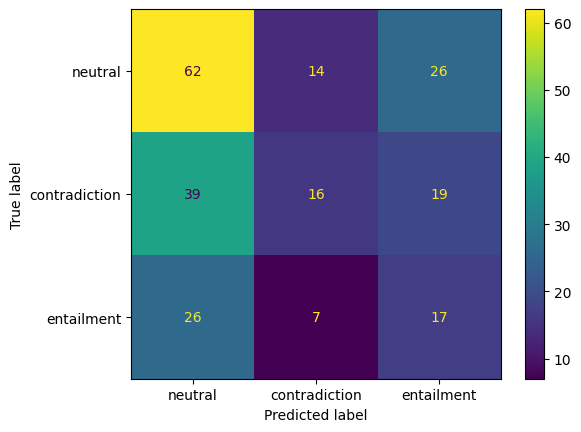

Predictions saved to /content/drive/MyDrive/EXPERIMENTS_PREDICTIONS/pruned_reasoning_anli/middle_layer_pruning_predictions.csv

Evaluating model from /content/drive/MyDrive/EXPERIMENTS_MODELS/pruned_baseline/top_layer_pruning


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EXPERIMENTS_MODELS/pruned_baseline/top_layer_pruning and are newly initialized: ['distilbert.transformer.layer.0.attention.k_lin.bias', 'distilbert.transformer.layer.0.attention.k_lin.weight', 'distilbert.transformer.layer.0.attention.out_lin.bias', 'distilbert.transformer.layer.0.attention.out_lin.weight', 'distilbert.transformer.layer.0.attention.q_lin.bias', 'distilbert.transformer.layer.0.attention.q_lin.weight', 'distilbert.transformer.layer.0.attention.v_lin.bias', 'distilbert.transformer.layer.0.attention.v_lin.weight', 'distilbert.transformer.layer.0.ffn.lin1.bias', 'distilbert.transformer.layer.0.ffn.lin1.weight', 'distilbert.transformer.layer.0.ffn.lin2.bias', 'distilbert.transformer.layer.0.ffn.lin2.weight', 'distilbert.transformer.layer.0.output_layer_norm.bias', 'distilbert.transformer.layer.0.output_layer_norm.weight', 'distilbert.transformer.layer.

Map:   0%|          | 0/226 [00:00<?, ? examples/s]


Overall Classification Report:
               precision    recall  f1-score   support

      neutral       0.46      0.59      0.52       102
contradiction       0.39      0.23      0.29        74
   entailment       0.27      0.28      0.27        50

     accuracy                           0.40       226
    macro avg       0.37      0.37      0.36       226
 weighted avg       0.39      0.40      0.39       226


Overall Confusion Matrix:


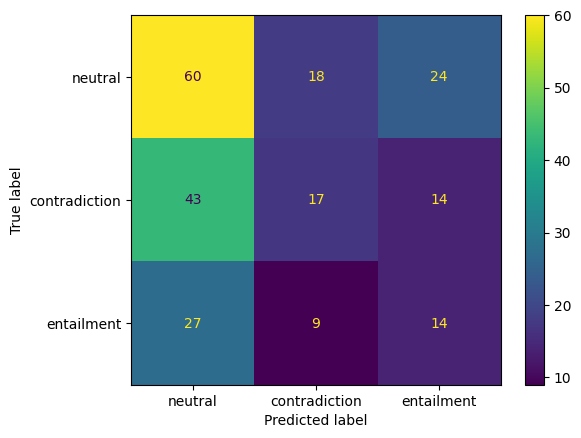

Predictions saved to /content/drive/MyDrive/EXPERIMENTS_PREDICTIONS/pruned_reasoning_anli/top_layer_pruning_predictions.csv


In [ ]:
def evaluate_with_phenomena(trainer, dataset, label_list, output_csv_path):
    predictions, labels, _ = trainer.predict(dataset)
    pred_labels = np.argmax(predictions, axis=1)

    print("\nOverall Classification Report:")
    report = classification_report(labels, pred_labels, target_names=label_list)
    print(report)

    cf_matrix = confusion_matrix(labels, pred_labels)
    print("\nOverall Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=label_list).plot()
    plt.show()

    dataset_df = pd.DataFrame({
        'input_text': dataset['input_text'],
        'true_label': labels,
        'predicted_label': pred_labels
    })
    reverse_label_mapping = {0: "neutral", 1: "contradiction", 2: "entailment"}
    dataset_df['true_label'] = dataset_df['true_label'].map(reverse_label_mapping)
    dataset_df['predicted_label'] = dataset_df['predicted_label'].map(reverse_label_mapping)
    dataset_df.to_csv(output_csv_path, index=False)
    print(f"Predictions saved to {output_csv_path}")


for model_folder in model_folders:
    print(f"\nEvaluating model from {model_folder}")

   #tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_folder)
    model = AutoModelForSequenceClassification.from_pretrained(model_folder)


    def tokenize_function(examples):
        return tokenizer(examples['input_text'], padding="max_length", truncation=True)

    # using the current tknsr
    tokenized_dataset = adversarial_test_dataset.map(tokenize_function, batched=True)
    tokenized_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

    trainer = Trainer(model=model, tokenizer=tokenizer)

    #predictions
    model_name = os.path.basename(model_folder)
    output_csv_path = f"/content/drive/MyDrive/EXPERIMENTS_PREDICTIONS/pruned_reasoning_anli/{model_name}_predictions.csv"

    evaluate_with_phenomena(trainer, tokenized_dataset, ["neutral", "contradiction", "entailment"], output_csv_path)